In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

### 1.1. Скачать следующие данные: kc-house-data и laptop_price


In [2]:
df = pd.read_csv('kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости


In [3]:
df['price'].value_counts()


price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

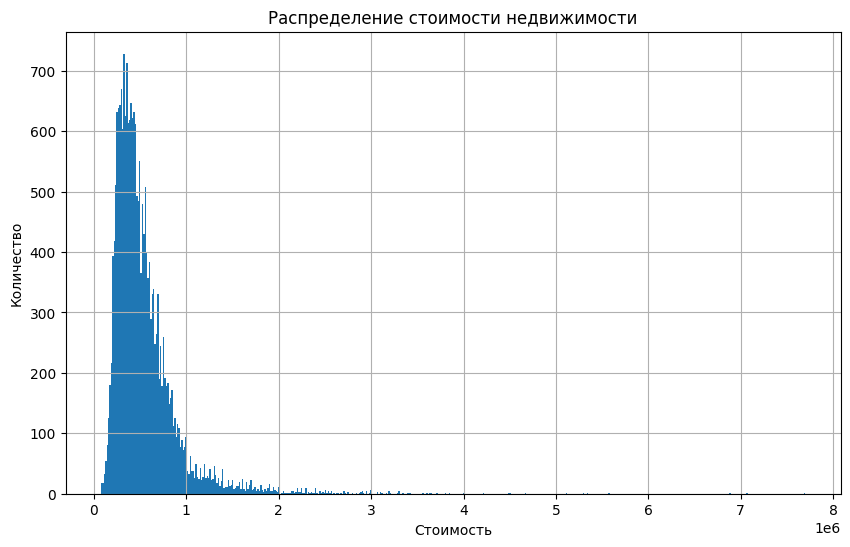

In [4]:
plt.figure(figsize = (10,6))

plt.hist(df['price'], bins = 500)

plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.grid();

<font color='green'>По графику видно, что большая часть домов лежит в пределах до 1000000</font>

### 1.3. Изучите распределение квадратуры жилой


In [5]:
df['sqft_living'].value_counts()

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: count, Length: 1038, dtype: int64

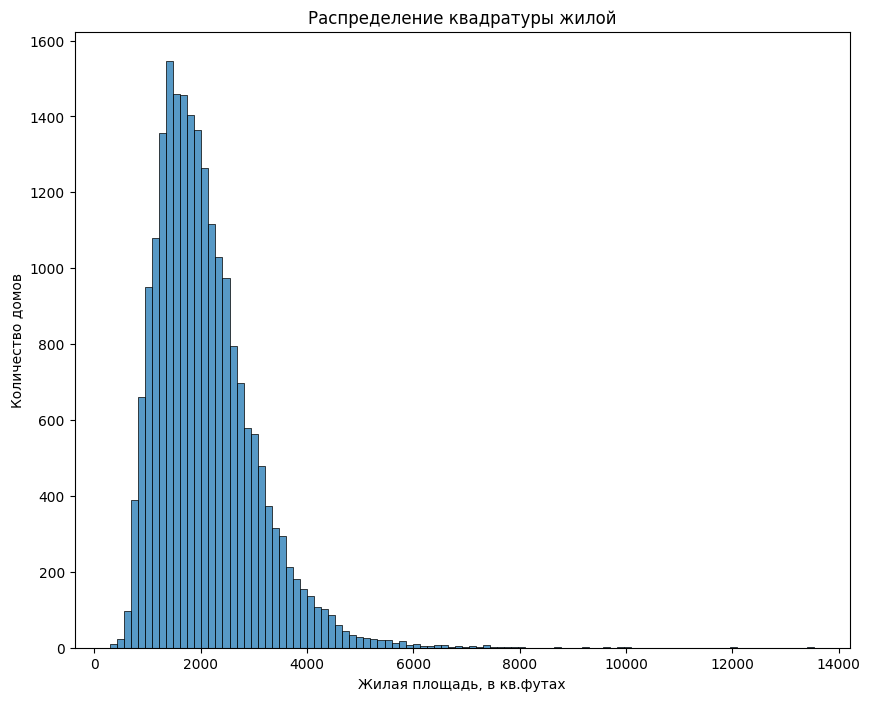

In [6]:
plt.figure(figsize=(10,8))
sns.histplot(df['sqft_living'], bins=100)
plt.title('Распределение квадратуры жилой')
plt.xlabel('Жилая площадь, в кв.футах')
plt.ylabel('Количество домов');

<font color='green'>Основная часть домов имеет жилую площадт от 1000 до 3000 кв.футов</font>

### 1.4. Изучите распределение года постройки

In [7]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

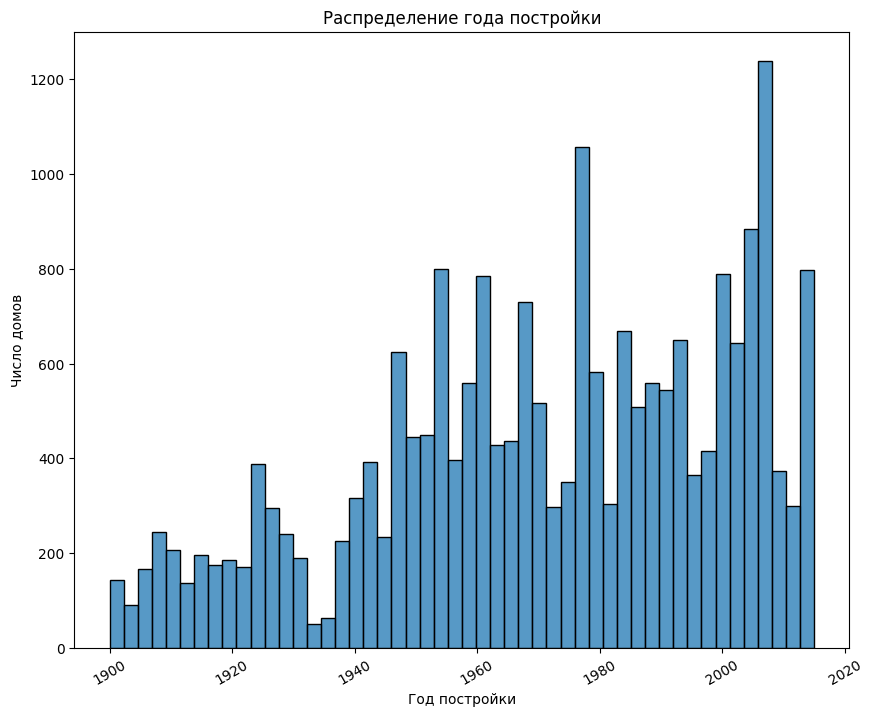

In [8]:
plt.figure(figsize=(10,8))
sns.histplot(df['yr_built'], bins=50)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Число домов')
plt.xticks(rotation=30);

<font color='green'>Строительство новых домов не имеет четкой зависимости. Была сильная просадка в 30е годы. Тем не менее темпы нового строительства растут после 50-х</font>

## Условие 2: 2 задача


### 2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы


In [9]:
data = df['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

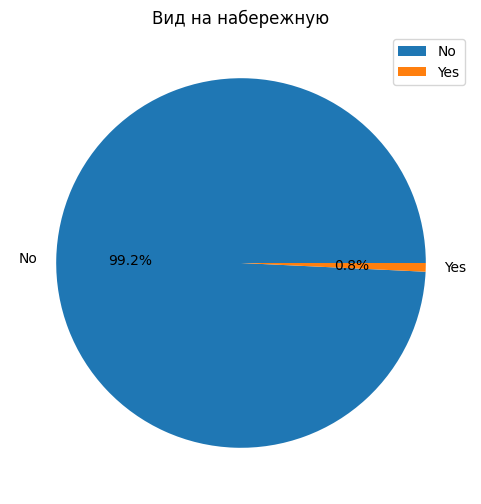

In [10]:
plt.figure(figsize=(6,6))
plt.pie(data, autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Вид на набережную')
plt.legend(['No', 'Yes']);

<font color='green'>Основная часть домов без вида на набережную</font>

### 2.2. Изучите распределение этажей домов


In [11]:
data1 = df['floors'].value_counts()
data1

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

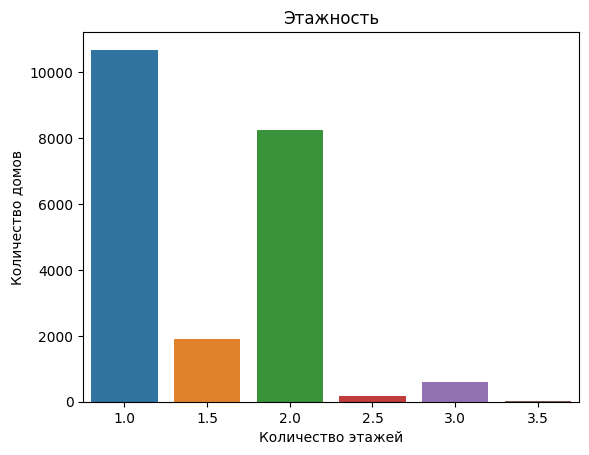

In [12]:
count_floors = df['floors'].value_counts()
sns.barplot(x=count_floors.index, y=count_floors.values)

plt.title("Этажность")
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.show()

<font color='green'>Основная часть домов имеют 1 или 2 этажа</font>

### 2.3. Изучите распределение состояния домов

In [13]:
data2 = df['condition'].value_counts()
data2

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

## Условие 3: 3 задача

In [14]:
corr_matrix = df.corr()

ValueError: could not convert string to float: '20141013T000000'

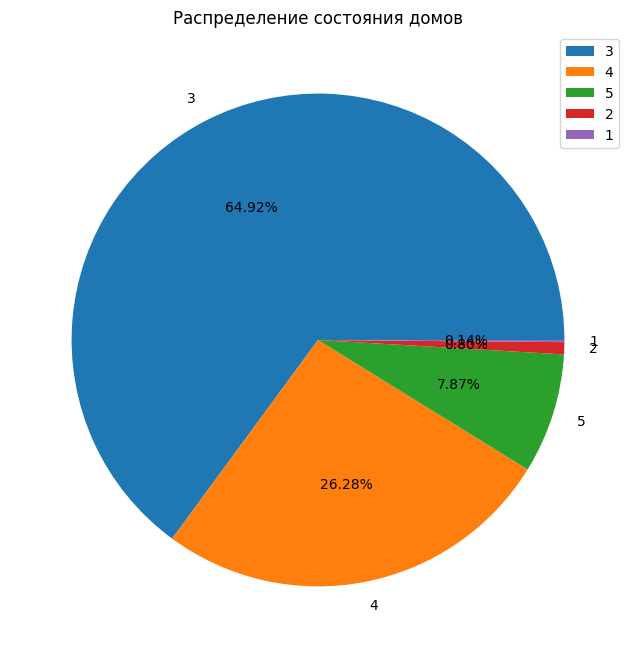

In [15]:
plt.figure(figsize=(8,8))

plt.pie(data2, labels = data2.index, autopct = '%1.2f%%')
plt.title('Распределение состояния домов')
plt.legend(data2.index, loc='best');

<font color='green'>Основная часть домов имеют оценку 3, затем 4.Процент домов в неудовлетворительном состоянии очень мало</font>

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

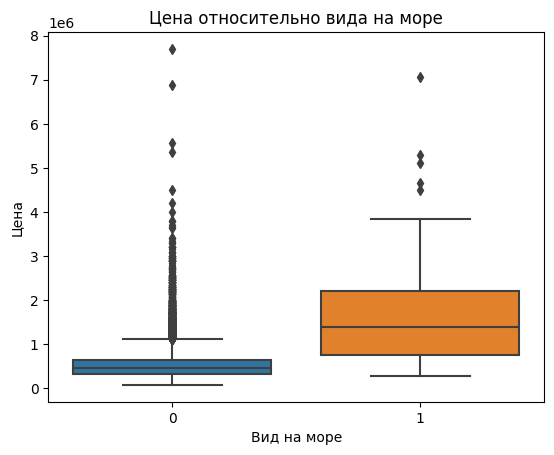

In [16]:
plt.figure()
sns.boxplot(x=df['waterfront'], y= df['price'])
plt.xlabel('Вид на море')
plt.ylabel('Цена')
plt.title('Цена относительно вида на море');

<font color='green'>Дома с видом на море дороже</font>

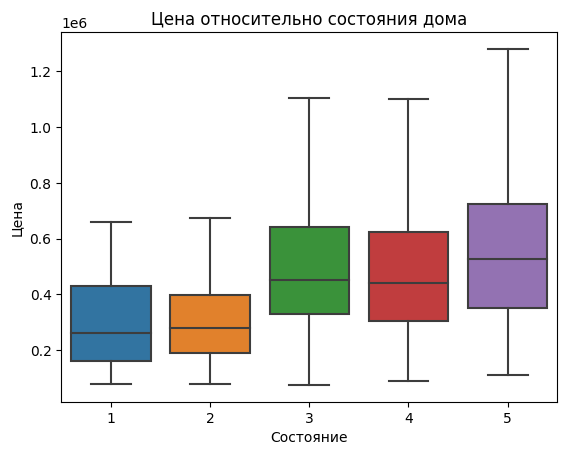

In [17]:
plt.figure()
sns.boxplot(x=df['condition'], y=df['price'], showfliers = False)

plt.xlabel('Состояние')
plt.ylabel('Цена')
plt.title('Цена относительно состояния дома');

<font color='green'>При оценке 1 или 2 цена заметно 'проседает'</font>

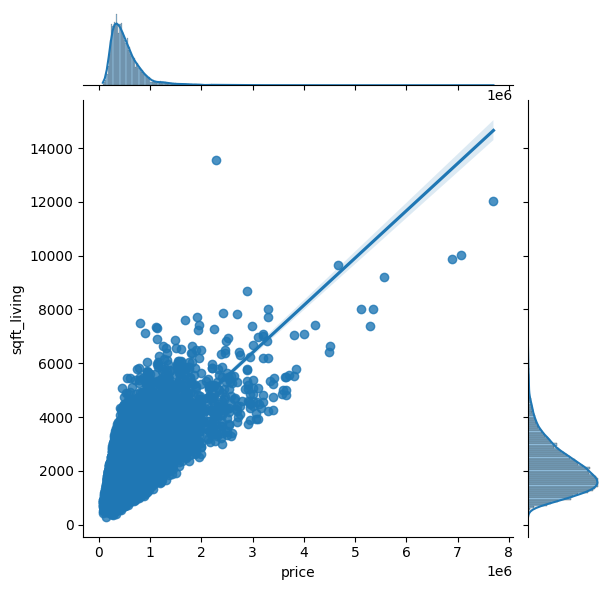

In [18]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');


<font color='green'>Чем больше жилая площадь дома, тем выше его стоимость, что вполне логично</font>

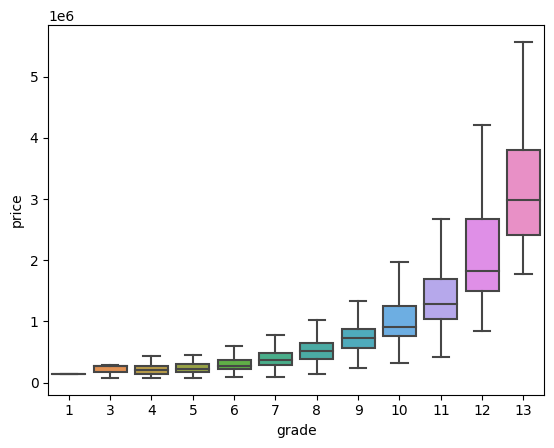

In [19]:
sns.boxplot(x=df['grade'], y=df['price'], showfliers = False);

<font color='green'>Прямое соотношение цены и грейда</font>